In [1]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
class neuralNetwork:
    
    def __init__(self, inodes, hnodes, onodes, lr):
        self.inodes = inodes
        self.hnodes = hnodes
        self.onodes = onodes
        self.lr = lr       
        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.inodes, self.hnodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.hnodes, self.onodes))
        self.activation = lambda x: sp.expit(x)
        
        pass
    
    def train(self, input_list, target_list):
        inputs = np.array([input_list])
        targets = np.array([target_list])
        
        hinputs = np.dot(inputs, self.wih)
        houtputs = self.activation(hinputs)
        
        finputs = np.dot(houtputs, self.who)
        foutputs = self.activation(finputs)
        
        oerrors = targets - foutputs
        herrors = np.dot(oerrors, self.who.T)
        
        self.who += self.lr*np.dot(houtputs.T, (oerrors*foutputs*(1-foutputs)))
        self.wih += self.lr*np.dot(inputs.T, (herrors*houtputs*(1-houtputs)))
        
        pass
    
    def query(self, input_list):
        inputs = np.array([input_list])
        
        hinputs = np.dot(inputs, self.wih)
        houtputs = self.activation(hinputs)
        
        finputs = np.dot(houtputs, self.who)
        foutputs = self.activation(finputs) 
        
        return foutputs

In [11]:
inodes = 784
hnodes = 100
onodes = 10
rate = 0.3

nn = neuralNetwork(inodes, hnodes, onodes, rate)

In [12]:
%%time

data_file = open("mnist_dataset/mnist_train.csv", 'r')
data_list = data_file.readlines()
del data_list[0]
data_file.close()

for each in data_list:
    all_values = each.split(',')
    inputs = (np.asfarray(all_values[1:])/255*0.99) + 0.01
    targets = np.zeros(onodes) + 0.01
    targets[int(all_values[0])] = 0.99
    nn.train(inputs, targets)
    pass

CPU times: total: 38.2 s
Wall time: 33.6 s


In [13]:
test_data_file = open("mnist_dataset/mnist_test.csv",'r')
test_data_list = test_data_file.readlines()
del test_data_list[0]
test_data_file.close()

score = []

for each in test_data_list:
    all_values = each.split(',')
    correct_label = all_values[0]
    print("Correct label: ", correct_label)
    
    inputs = (np.asfarray(all_values[1:])/255 * 0.99) + 0.01
    outputs = nn.query(inputs)
    label = np.argmax(outputs)
    print("Network's answer: ", label)
    
    if label == int(correct_label):
        score.append(1)
    else:
        score.append(0)
    pass

Correct label:  7
Network's answer:  7
Correct label:  2
Network's answer:  2
Correct label:  1
Network's answer:  1
Correct label:  0
Network's answer:  0
Correct label:  4
Network's answer:  4
Correct label:  1
Network's answer:  1
Correct label:  4
Network's answer:  4
Correct label:  9
Network's answer:  9
Correct label:  5
Network's answer:  6
Correct label:  9
Network's answer:  9
Correct label:  0
Network's answer:  0
Correct label:  6
Network's answer:  6
Correct label:  9
Network's answer:  9
Correct label:  0
Network's answer:  0
Correct label:  1
Network's answer:  1
Correct label:  5
Network's answer:  5
Correct label:  9
Network's answer:  9
Correct label:  7
Network's answer:  7
Correct label:  3
Network's answer:  3
Correct label:  4
Network's answer:  4
Correct label:  9
Network's answer:  9
Correct label:  6
Network's answer:  6
Correct label:  6
Network's answer:  6
Correct label:  5
Network's answer:  5
Correct label:  4
Network's answer:  4
Correct label:  0
Network

Network's answer:  7
Correct label:  6
Network's answer:  6
Correct label:  7
Network's answer:  7
Correct label:  1
Network's answer:  1
Correct label:  2
Network's answer:  2
Correct label:  5
Network's answer:  5
Correct label:  8
Network's answer:  8
Correct label:  0
Network's answer:  0
Correct label:  3
Network's answer:  3
Correct label:  7
Network's answer:  7
Correct label:  2
Network's answer:  9
Correct label:  4
Network's answer:  4
Correct label:  0
Network's answer:  0
Correct label:  9
Network's answer:  9
Correct label:  1
Network's answer:  1
Correct label:  8
Network's answer:  8
Correct label:  6
Network's answer:  6
Correct label:  7
Network's answer:  7
Correct label:  7
Network's answer:  7
Correct label:  4
Network's answer:  4
Correct label:  3
Network's answer:  3
Correct label:  4
Network's answer:  4
Correct label:  9
Network's answer:  9
Correct label:  1
Network's answer:  1
Correct label:  9
Network's answer:  9
Correct label:  5
Network's answer:  5
Corr

Network's answer:  0
Correct label:  5
Network's answer:  5
Correct label:  4
Network's answer:  4
Correct label:  0
Network's answer:  0
Correct label:  2
Network's answer:  2
Correct label:  8
Network's answer:  8
Correct label:  7
Network's answer:  2
Correct label:  2
Network's answer:  2
Correct label:  9
Network's answer:  3
Correct label:  8
Network's answer:  8
Correct label:  4
Network's answer:  4
Correct label:  0
Network's answer:  0
Correct label:  9
Network's answer:  9
Correct label:  5
Network's answer:  5
Correct label:  8
Network's answer:  8
Correct label:  5
Network's answer:  5
Correct label:  1
Network's answer:  1
Correct label:  2
Network's answer:  2
Correct label:  1
Network's answer:  1
Correct label:  3
Network's answer:  3
Correct label:  1
Network's answer:  1
Correct label:  7
Network's answer:  7
Correct label:  4
Network's answer:  9
Correct label:  5
Network's answer:  5
Correct label:  7
Network's answer:  7
Correct label:  2
Network's answer:  2
Corr

Network's answer:  9
Correct label:  8
Network's answer:  8
Correct label:  7
Network's answer:  7
Correct label:  1
Network's answer:  1
Correct label:  1
Network's answer:  1
Correct label:  6
Network's answer:  6
Correct label:  7
Network's answer:  7
Correct label:  6
Network's answer:  6
Correct label:  3
Network's answer:  3
Correct label:  2
Network's answer:  2
Correct label:  2
Network's answer:  2
Correct label:  0
Network's answer:  0
Correct label:  8
Network's answer:  8
Correct label:  9
Network's answer:  9
Correct label:  2
Network's answer:  2
Correct label:  5
Network's answer:  5
Correct label:  1
Network's answer:  1
Correct label:  0
Network's answer:  0
Correct label:  8
Network's answer:  3
Correct label:  1
Network's answer:  1
Correct label:  9
Network's answer:  4
Correct label:  5
Network's answer:  5
Correct label:  7
Network's answer:  7
Correct label:  9
Network's answer:  9
Correct label:  6
Network's answer:  6
Correct label:  9
Network's answer:  9
Corr

Network's answer:  1
Correct label:  7
Network's answer:  7
Correct label:  0
Network's answer:  0
Correct label:  7
Network's answer:  7
Correct label:  6
Network's answer:  6
Correct label:  4
Network's answer:  4
Correct label:  1
Network's answer:  1
Correct label:  3
Network's answer:  3
Correct label:  8
Network's answer:  8
Correct label:  7
Network's answer:  7
Correct label:  4
Network's answer:  9
Correct label:  5
Network's answer:  5
Correct label:  9
Network's answer:  8
Correct label:  2
Network's answer:  2
Correct label:  5
Network's answer:  5
Correct label:  1
Network's answer:  1
Correct label:  8
Network's answer:  8
Correct label:  7
Network's answer:  7
Correct label:  3
Network's answer:  3
Correct label:  7
Network's answer:  7
Correct label:  1
Network's answer:  1
Correct label:  5
Network's answer:  5
Correct label:  5
Network's answer:  5
Correct label:  0
Network's answer:  0
Correct label:  9
Network's answer:  9
Correct label:  1
Network's answer:  1
Corr

Network's answer:  5
Correct label:  4
Network's answer:  6
Correct label:  5
Network's answer:  4
Correct label:  2
Network's answer:  2
Correct label:  5
Network's answer:  9
Correct label:  6
Network's answer:  6
Correct label:  5
Network's answer:  5
Correct label:  3
Network's answer:  3
Correct label:  6
Network's answer:  6
Correct label:  7
Network's answer:  7
Correct label:  4
Network's answer:  4
Correct label:  1
Network's answer:  1
Correct label:  7
Network's answer:  7
Correct label:  1
Network's answer:  1
Correct label:  5
Network's answer:  5
Correct label:  2
Network's answer:  2
Correct label:  3
Network's answer:  3
Correct label:  6
Network's answer:  0
Correct label:  3
Network's answer:  3
Correct label:  1
Network's answer:  3
Correct label:  4
Network's answer:  4
Correct label:  2
Network's answer:  2
Correct label:  6
Network's answer:  6
Correct label:  7
Network's answer:  7
Correct label:  4
Network's answer:  4
Correct label:  3
Network's answer:  3
Corr

Network's answer:  0
Correct label:  1
Network's answer:  1
Correct label:  8
Network's answer:  3
Correct label:  8
Network's answer:  8
Correct label:  2
Network's answer:  2
Correct label:  8
Network's answer:  3
Correct label:  3
Network's answer:  3
Correct label:  5
Network's answer:  5
Correct label:  7
Network's answer:  7
Correct label:  8
Network's answer:  8
Correct label:  0
Network's answer:  0
Correct label:  8
Network's answer:  8
Correct label:  5
Network's answer:  5
Correct label:  7
Network's answer:  7
Correct label:  1
Network's answer:  1
Correct label:  1
Network's answer:  1
Correct label:  0
Network's answer:  0
Correct label:  1
Network's answer:  1
Correct label:  3
Network's answer:  3
Correct label:  7
Network's answer:  7
Correct label:  8
Network's answer:  8
Correct label:  5
Network's answer:  5
Correct label:  0
Network's answer:  0
Correct label:  7
Network's answer:  7
Correct label:  1
Network's answer:  1
Correct label:  1
Network's answer:  1
Corr

Network's answer:  8
Correct label:  5
Network's answer:  5
Correct label:  1
Network's answer:  1
Correct label:  9
Network's answer:  8
Correct label:  0
Network's answer:  0
Correct label:  0
Network's answer:  0
Correct label:  6
Network's answer:  6
Correct label:  0
Network's answer:  0
Correct label:  7
Network's answer:  7
Correct label:  3
Network's answer:  3
Correct label:  1
Network's answer:  1
Correct label:  8
Network's answer:  8
Correct label:  3
Network's answer:  3
Correct label:  9
Network's answer:  9
Correct label:  7
Network's answer:  7
Correct label:  0
Network's answer:  0
Correct label:  0
Network's answer:  0
Correct label:  8
Network's answer:  8
Correct label:  9
Network's answer:  4
Correct label:  5
Network's answer:  5
Correct label:  9
Network's answer:  9
Correct label:  8
Network's answer:  8
Correct label:  3
Network's answer:  3
Correct label:  2
Network's answer:  2
Correct label:  7
Network's answer:  7
Correct label:  2
Network's answer:  2
Corr

Network's answer:  4
Correct label:  1
Network's answer:  1
Correct label:  7
Network's answer:  7
Correct label:  1
Network's answer:  1
Correct label:  2
Network's answer:  2
Correct label:  3
Network's answer:  3
Correct label:  7
Network's answer:  7
Correct label:  9
Network's answer:  9
Correct label:  7
Network's answer:  7
Correct label:  4
Network's answer:  4
Correct label:  9
Network's answer:  9
Correct label:  9
Network's answer:  9
Correct label:  3
Network's answer:  3
Correct label:  9
Network's answer:  9
Correct label:  2
Network's answer:  2
Correct label:  8
Network's answer:  8
Correct label:  2
Network's answer:  2
Correct label:  7
Network's answer:  7
Correct label:  1
Network's answer:  1
Correct label:  8
Network's answer:  5
Correct label:  0
Network's answer:  0
Correct label:  9
Network's answer:  9
Correct label:  1
Network's answer:  1
Correct label:  0
Network's answer:  0
Correct label:  1
Network's answer:  1
Correct label:  7
Network's answer:  7
Corr

Network's answer:  7
Correct label:  9
Network's answer:  9
Correct label:  6
Network's answer:  6
Correct label:  2
Network's answer:  2
Correct label:  6
Network's answer:  6
Correct label:  2
Network's answer:  2
Correct label:  2
Network's answer:  2
Correct label:  9
Network's answer:  9
Correct label:  9
Network's answer:  9
Correct label:  0
Network's answer:  0
Correct label:  1
Network's answer:  1
Correct label:  2
Network's answer:  2
Correct label:  3
Network's answer:  3
Correct label:  4
Network's answer:  4
Correct label:  5
Network's answer:  5
Correct label:  6
Network's answer:  6
Correct label:  7
Network's answer:  7
Correct label:  8
Network's answer:  8
Correct label:  9
Network's answer:  9
Correct label:  0
Network's answer:  0
Correct label:  1
Network's answer:  1
Correct label:  2
Network's answer:  2
Correct label:  3
Network's answer:  3
Correct label:  4
Network's answer:  4
Correct label:  5
Network's answer:  5
Correct label:  6
Network's answer:  6
Corr

Network's answer:  0
Correct label:  1
Network's answer:  1
Correct label:  0
Network's answer:  0
Correct label:  5
Network's answer:  5
Correct label:  3
Network's answer:  3
Correct label:  1
Network's answer:  1
Correct label:  9
Network's answer:  9
Correct label:  2
Network's answer:  2
Correct label:  1
Network's answer:  1
Correct label:  9
Network's answer:  9
Correct label:  6
Network's answer:  6
Correct label:  0
Network's answer:  0
Correct label:  4
Network's answer:  4
Correct label:  6
Network's answer:  6
Correct label:  1
Network's answer:  1
Correct label:  7
Network's answer:  7
Correct label:  3
Network's answer:  3
Correct label:  8
Network's answer:  8
Correct label:  7
Network's answer:  7
Correct label:  2
Network's answer:  2
Correct label:  9
Network's answer:  9
Correct label:  6
Network's answer:  6
Correct label:  5
Network's answer:  5
Correct label:  8
Network's answer:  8
Correct label:  3
Network's answer:  3
Correct label:  5
Network's answer:  3
Corr

Network's answer:  3
Correct label:  6
Network's answer:  6
Correct label:  0
Network's answer:  0
Correct label:  2
Network's answer:  2
Correct label:  7
Network's answer:  7
Correct label:  6
Network's answer:  6
Correct label:  6
Network's answer:  6
Correct label:  1
Network's answer:  1
Correct label:  2
Network's answer:  2
Correct label:  8
Network's answer:  8
Correct label:  8
Network's answer:  8
Correct label:  7
Network's answer:  7
Correct label:  7
Network's answer:  7
Correct label:  4
Network's answer:  4
Correct label:  7
Network's answer:  7
Correct label:  7
Network's answer:  7
Correct label:  3
Network's answer:  3
Correct label:  7
Network's answer:  7
Correct label:  4
Network's answer:  4
Correct label:  5
Network's answer:  5
Correct label:  4
Network's answer:  4
Correct label:  3
Network's answer:  3
Correct label:  3
Network's answer:  3
Correct label:  8
Network's answer:  8
Correct label:  4
Network's answer:  4
Correct label:  1
Network's answer:  1
Corr

Network's answer:  2
Correct label:  1
Network's answer:  1
Correct label:  9
Network's answer:  9
Correct label:  4
Network's answer:  4
Correct label:  9
Network's answer:  9
Correct label:  1
Network's answer:  1
Correct label:  3
Network's answer:  3
Correct label:  9
Network's answer:  9
Correct label:  2
Network's answer:  2
Correct label:  0
Network's answer:  0
Correct label:  6
Network's answer:  6
Correct label:  0
Network's answer:  0
Correct label:  4
Network's answer:  4
Correct label:  0
Network's answer:  0
Correct label:  6
Network's answer:  6
Correct label:  0
Network's answer:  0
Correct label:  1
Network's answer:  1
Correct label:  2
Network's answer:  2
Correct label:  3
Network's answer:  3
Correct label:  4
Network's answer:  4
Correct label:  5
Network's answer:  5
Correct label:  6
Network's answer:  6
Correct label:  7
Network's answer:  7
Correct label:  8
Network's answer:  8
Correct label:  9
Network's answer:  9
Correct label:  0
Network's answer:  0
Corr

Network's answer:  5
Correct label:  6
Network's answer:  6
Correct label:  7
Network's answer:  7
Correct label:  4
Network's answer:  4
Correct label:  7
Network's answer:  7
Correct label:  5
Network's answer:  5
Correct label:  4
Network's answer:  4
Correct label:  1
Network's answer:  1
Correct label:  3
Network's answer:  3
Correct label:  5
Network's answer:  5
Correct label:  3
Network's answer:  3
Correct label:  1
Network's answer:  1
Correct label:  2
Network's answer:  2
Correct label:  3
Network's answer:  3
Correct label:  4
Network's answer:  4
Correct label:  5
Network's answer:  5
Correct label:  6
Network's answer:  6
Correct label:  1
Network's answer:  1
Correct label:  2
Network's answer:  2
Correct label:  3
Network's answer:  3
Correct label:  4
Network's answer:  4
Correct label:  6
Network's answer:  6
Correct label:  0
Network's answer:  0
Correct label:  1
Network's answer:  1
Correct label:  2
Network's answer:  2
Correct label:  4
Network's answer:  4
Corr

Network's answer:  7
Correct label:  8
Network's answer:  8
Correct label:  9
Network's answer:  9
Correct label:  8
Network's answer:  8
Correct label:  9
Network's answer:  9
Correct label:  5
Network's answer:  5
Correct label:  7
Network's answer:  7
Correct label:  0
Network's answer:  0
Correct label:  3
Network's answer:  3
Correct label:  1
Network's answer:  1
Correct label:  6
Network's answer:  6
Correct label:  8
Network's answer:  8
Correct label:  4
Network's answer:  4
Correct label:  1
Network's answer:  1
Correct label:  5
Network's answer:  5
Correct label:  6
Network's answer:  6
Correct label:  4
Network's answer:  4
Correct label:  2
Network's answer:  2
Correct label:  7
Network's answer:  7
Correct label:  8
Network's answer:  8
Correct label:  1
Network's answer:  1
Correct label:  3
Network's answer:  3
Correct label:  4
Network's answer:  4
Correct label:  3
Network's answer:  3
Correct label:  4
Network's answer:  4
Correct label:  7
Network's answer:  7
Corr

Network's answer:  1
Correct label:  5
Network's answer:  5
Correct label:  1
Network's answer:  1
Correct label:  7
Network's answer:  7
Correct label:  6
Network's answer:  6
Correct label:  1
Network's answer:  1
Correct label:  2
Network's answer:  2
Correct label:  1
Network's answer:  1
Correct label:  6
Network's answer:  6
Correct label:  8
Network's answer:  8
Correct label:  0
Network's answer:  0
Correct label:  1
Network's answer:  1
Correct label:  2
Network's answer:  2
Correct label:  3
Network's answer:  3
Correct label:  4
Network's answer:  4
Correct label:  5
Network's answer:  5
Correct label:  6
Network's answer:  6
Correct label:  7
Network's answer:  7
Correct label:  8
Network's answer:  8
Correct label:  9
Network's answer:  9
Correct label:  0
Network's answer:  0
Correct label:  1
Network's answer:  1
Correct label:  2
Network's answer:  2
Correct label:  3
Network's answer:  3
Correct label:  4
Network's answer:  4
Correct label:  5
Network's answer:  5
Corr

Network's answer:  9
Correct label:  2
Network's answer:  2
Correct label:  6
Network's answer:  6
Correct label:  7
Network's answer:  7
Correct label:  6
Network's answer:  6
Correct label:  6
Network's answer:  6
Correct label:  8
Network's answer:  8
Correct label:  7
Network's answer:  7
Correct label:  4
Network's answer:  4
Correct label:  9
Network's answer:  9
Correct label:  2
Network's answer:  2
Correct label:  1
Network's answer:  1
Correct label:  3
Network's answer:  3
Correct label:  3
Network's answer:  3
Correct label:  0
Network's answer:  0
Correct label:  5
Network's answer:  5
Correct label:  5
Network's answer:  5
Correct label:  8
Network's answer:  8
Correct label:  0
Network's answer:  0
Correct label:  3
Network's answer:  3
Correct label:  7
Network's answer:  7
Correct label:  9
Network's answer:  9
Correct label:  7
Network's answer:  7
Correct label:  0
Network's answer:  0
Correct label:  2
Network's answer:  2
Correct label:  7
Network's answer:  7
Corr

Network's answer:  8
Correct label:  9
Network's answer:  9
Correct label:  7
Network's answer:  7
Correct label:  4
Network's answer:  4
Correct label:  6
Network's answer:  6
Correct label:  1
Network's answer:  1
Correct label:  4
Network's answer:  4
Correct label:  0
Network's answer:  0
Correct label:  9
Network's answer:  9
Correct label:  9
Network's answer:  9
Correct label:  3
Network's answer:  3
Correct label:  7
Network's answer:  7
Correct label:  8
Network's answer:  8
Correct label:  4
Network's answer:  6
Correct label:  7
Network's answer:  7
Correct label:  5
Network's answer:  5
Correct label:  8
Network's answer:  8
Correct label:  5
Network's answer:  6
Correct label:  3
Network's answer:  3
Correct label:  2
Network's answer:  0
Correct label:  2
Network's answer:  0
Correct label:  0
Network's answer:  0
Correct label:  5
Network's answer:  5
Correct label:  8
Network's answer:  8
Correct label:  6
Network's answer:  6
Correct label:  0
Network's answer:  0
Corr

In [15]:
scorecard =  np.array(score)
print("Performance ", scorecard.sum()/scorecard.size)

Performance  0.9479


8


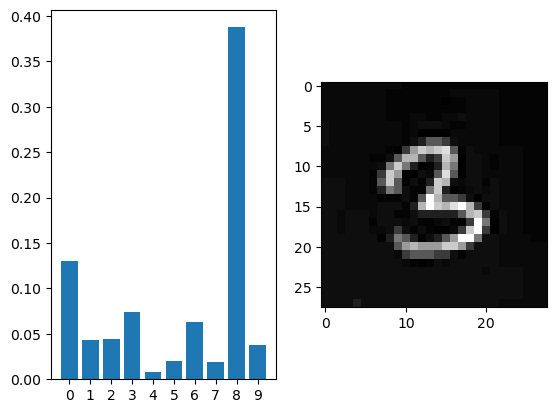

In [69]:
img_array = plt.imread("own_data/3.png")[:,:,0]
img_array = 1.0 - img_array

processed = np.array([img_array.flatten() * 0.99 + 0.01])

result = nn.query(processed)
print(np.argmax(result))

plt.subplot(1, 2, 1)
plt.bar(range(10), result.flatten())
plt.xticks(range(10))

plt.subplot(1, 2, 2)
plt.imshow(processed.reshape(28,28), cmap="gray")

plt.imshow(new_array, cmap="gray")

3


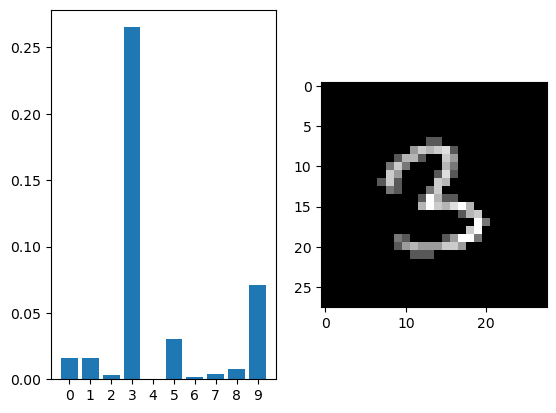

In [73]:
img = plt.imread("own_data/3.png")[:,:,0]
img = 1.0 - img
img = img - img.min()
img = img / img.max()

processed = np.array([img.flatten() * 0.99 + 0.01])
processed[processed < 0.3] = 0.01

result = nn.query(processed)
print(np.argmax(result))

plt.subplot(1, 2, 1)
plt.bar(range(10), result.flatten())
plt.xticks(range(10))

plt.subplot(1, 2, 2)
plt.imshow(processed.reshape(28,28), cmap="gray")

plt.show()

In [74]:
import scipy.misc
im_arr = scipy.misc.imread('own_data', flatten = True)
im_arr

AttributeError: scipy.misc is deprecated and has no attribute imread.